<a href="https://colab.research.google.com/github/MalihaUCF/Machine-Learning-Course-Assignments--Spring-2019/blob/master/Assignment1/Problem3/Problem3_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Training Data Shape (60000, 28, 28)
Test Data Shape (10000, 28, 28)
The train and test labels look like this, (60000,) (10000,)
train_labels 0
(784, 60000)
(60000,)
[45084 33389 21425 ... 33653 57833 58618]
(784, 60000)
(60000,)
Y-reshape- (1, 60000)
Y-reshape- (1, 10000)
(1, 60000, 10)
(10, 60000)


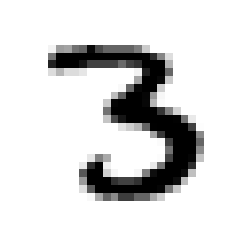

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[3]


In [1]:
#Correct from here

from keras.datasets import mnist
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()  



print('Training Data Shape',train_images.shape)
print('Test Data Shape',test_images.shape)
print('The train and test labels look like this,' ,train_labels.shape,test_labels.shape)


print('train_labels',train_labels[1])

#train_images,test_images=train_images.reshape(28*28,60000),test_images.reshape(28*28,10000)
#train_labels,test_labels=train_labels.reshape(1,60000),test_labels.reshape(1,10000)

train_images = train_images.reshape(60000, 28*28) 
test_images = test_images.reshape(10000, 28*28)


train_images = train_images.T 
test_images=test_images.T


print(train_images.shape)
print(train_labels.shape)

train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 
train_images /= 255 
test_images /= 255

np.random.seed(138)
shuffle_index = np.random.permutation(60000)
print(shuffle_index)
#train_images, train_labels = train_images[:,shuffle_index], train_labels[:,shuffle_index]
print(train_images.shape)
print(train_labels.shape)

train_labels, test_labels = train_labels.reshape(1,60000),test_labels.reshape(1,10000)

print('Y-reshape-',train_labels.shape)
print('Y-reshape-',test_labels.shape)


train_labels_new = np.eye(10)[train_labels.astype('int32')]
test_labels_new=np.eye(10)[test_labels.astype('int32')]

print(train_labels_new.shape)

train_labels_new=train_labels_new.T.reshape(10,60000)
test_labels_new=test_labels_new.T.reshape(10,10000)

print(train_labels_new.shape)


i = 12
plt.imshow(train_images[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(train_labels_new[:,i])
print(train_labels[:,i])


In [0]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [0]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [12]:
n_x = train_images.shape[0]
n_h = 64
learning_rate = 1


digits=10

m = train_images.shape[1]

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = train_images
Y = train_labels_new

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  8.105538117919917
Epoch 100 cost:  0.7285164584883146
Epoch 200 cost:  0.5645716335327154
Epoch 300 cost:  0.49082261811517225
Epoch 400 cost:  0.44472056413233496
Epoch 500 cost:  0.41175847688991823
Epoch 600 cost:  0.3863100228653539
Epoch 700 cost:  0.36560425535572744
Epoch 800 cost:  0.3481280680313978
Epoch 900 cost:  0.33306154588027276
Epoch 1000 cost:  0.3199195383117037
Epoch 1100 cost:  0.30834731819417666
Epoch 1200 cost:  0.29806950006493377
Epoch 1300 cost:  0.28885815159904865
Epoch 1400 cost:  0.28052727428870033
Epoch 1500 cost:  0.27292953029787803
Epoch 1600 cost:  0.26595000237385663
Epoch 1700 cost:  0.25949906745606627
Epoch 1800 cost:  0.25350567377415384
Epoch 1900 cost:  0.24791174739888927
Final cost: 0.2427192020304707


In [14]:
#testing
from sklearn.metrics import classification_report, confusion_matrix


Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 953    0   16    3    1   15    9    4    6    4]
 [   0 1107    8    2    3    3    2    5    3    6]
 [   3    4  920   20    7    4   13   19    6    1]
 [   3    2   29  911    2   31    1   10   32   11]
 [   1    1   11    0  906    8    8    8   10   43]
 [   9    2    5   38    2  791   16    3   20   20]
 [   6    2   10    3   15   16  901    0   10    1]
 [   3    3   13   11    4    5    4  950    7   15]
 [   2   13   18   17    7   13    4    4  869   16]
 [   0    1    2    5   35    6    0   25   11  892]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1011
           1       0.98      0.97      0.97      1139
           2       0.89      0.92      0.91       997
           3       0.90      0.88      0.89      1032
           4       0.92      0.91      0.92       996
           5       0.89      0.87      0.88       906
           6       0.94      0.93      0.94       964
           7       0.92      0.94   